In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
folder_data = '../Data'

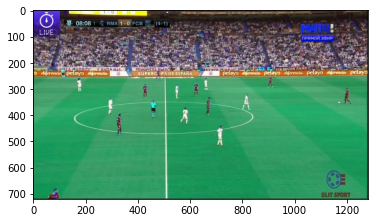

In [5]:
images = list()
for image in os.listdir(folder_data):
    img = cv2.imread(os.path.join(folder_data, image), cv2.COLOR_BGR2RGB)
    images.append(img)
    plt.imshow(img);

In [7]:
for idx, img in enumerate(images, 1):
    print(f'shape {idx}-image: {img.shape}')

shape 1-image: (720, 1280, 3)


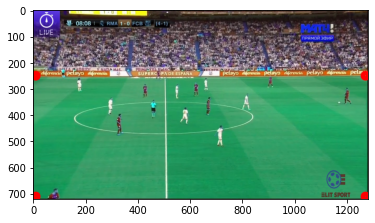

In [76]:
point_size = 15
point_color = (255, 0, 0) # BGR
thickness = 15 #ширина
radius = 10 # радиус

images_new = list()
for idx, img in enumerate(images, 1):
    img_new = img.copy()

    points_3d = [[10, 250], 
              [10, img_new.shape[0]-10], 
              [img_new.shape[1] - 10, 250], 
              [img_new.shape[1] - 10, img_new.shape[0]-10]]
    
#     points_3d = [[400, 400]]
    
    for point in points_3d:
        img_new = cv2.circle(img_new, point, radius, point_color, thickness) # наложение точек на изображение
    
    images_new.append(img_new)
    plt.imshow(img_new);

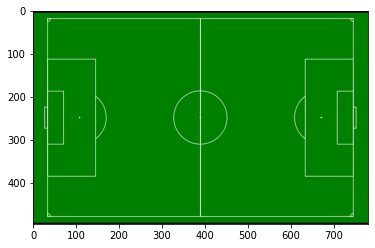

In [77]:
field = cv2.imread(os.path.join(folder_data, 'field.png'), cv2.COLOR_BGR2RGB)
plt.imshow(field);

In [78]:
field.shape

(496, 780, 3)

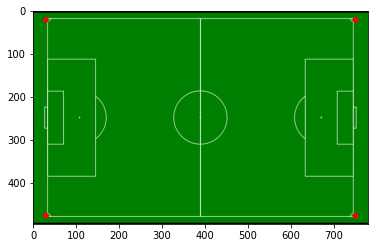

In [79]:
# примерные опорные точки для изображения
field_new = field.copy()
radius, point_color, thickness = 3, (255, 0, 0), 5


# points_2d = [[300, 20], 
#           [320, field.shape[0]-20], 
#           [600, 20], 
#           [550, field.shape[0]-20]]

points_2d = [[30, 20],
             [30, field.shape[0]-20],
             [field.shape[1]-30, 20],
             [field.shape[1]-30, field.shape[0]-20]
            ]

for point in points_2d:
    field_new = cv2.circle(field_new, point, radius, point_color, thickness) # наложение точек на изображение

plt.imshow(field_new);

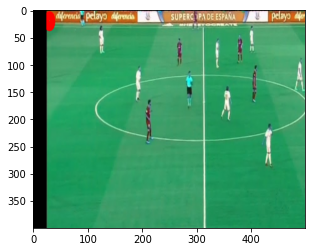

In [80]:
pts_3d = np.array(points_3d, np.float32)
pts_2d = np.array(points_2d, np.float32)

matrix = cv2.getPerspectiveTransform(pts_3d, pts_2d)
dst = cv2.warpPerspective(images_new[0], matrix, (500,400))
plt.imshow(dst)